In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("cluster.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [3]:
datasett=dataset.iloc[:,[3,4]]
datasett

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


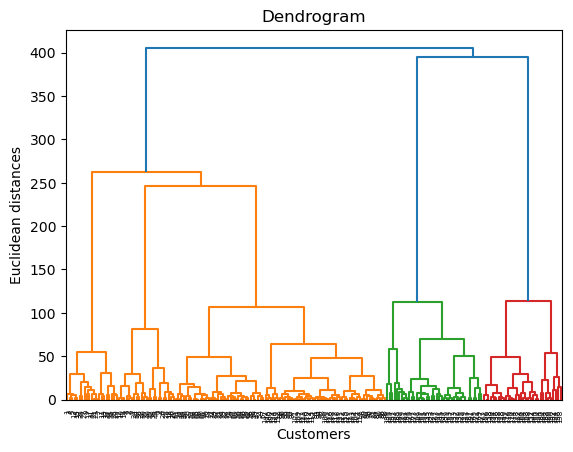

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(datasett, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
clusmodel = AgglomerativeClustering(n_clusters = 5)
label = clusmodel.fit_predict(datasett)
supervised=pd.DataFrame(datasett)
supervised['Cluster_group']=label
supervised

,Annual Income (k$),Spending Score (1-100),Cluster_group
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


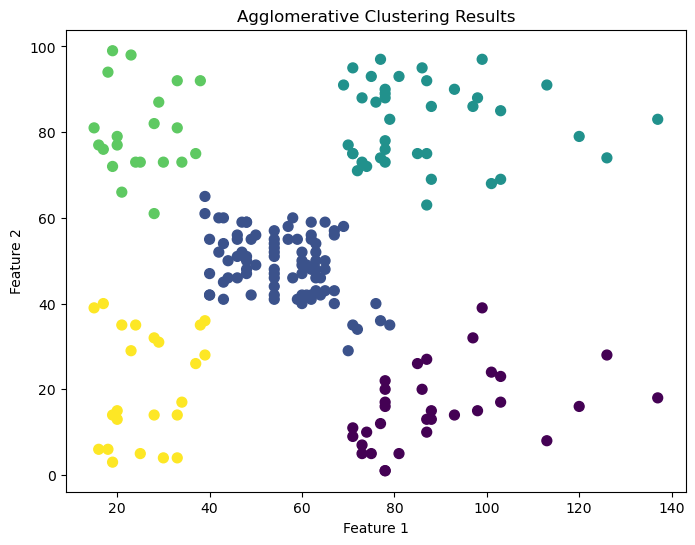

In [6]:
import matplotlib.pyplot as plt

# Assuming 'datasett' has at least two features (columns) for 2D plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the data points, colored by their cluster labels
plt.scatter(
    supervised.iloc[:, 0],  # First feature (x-axis)
    supervised.iloc[:, 1],  # Second feature (y-axis)
    c=supervised['Cluster_group'],  # Cluster labels as colors
    cmap='viridis',  # Color map
    s=50  # Size of points
)

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering Results')

# Displaying the plot
plt.show()
